In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from image_functions import *
import SimpleITK as sitk

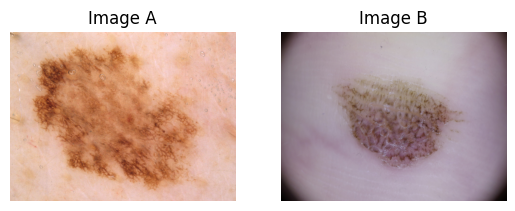

In [7]:
im_a = cv.imread('images/ISIC_0024328.jpg')
im_b = cv.imread('images/ISIC_0024340.jpg')

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Image A')
plt.imshow(cv.cvtColor(im_a, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Image B')
plt.imshow(cv.cvtColor(im_b, cv.COLOR_BGR2RGB))
plt.show()

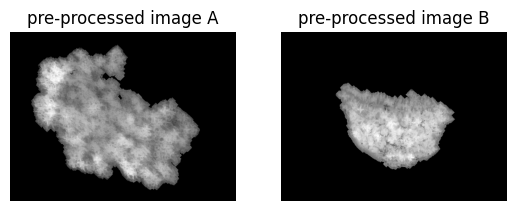

In [8]:
im_a, mask_a = preprocess(im_a)
im_b, mask_b = preprocess(im_b)

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('pre-processed image A')
plt.imshow(cv.cvtColor(mask_a, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('pre-processed image B')
plt.imshow(cv.cvtColor(mask_b, cv.COLOR_BGR2RGB))
plt.show()

In [11]:
im_a = im_a.astype('float32')
im_b = im_b.astype('float32')

im_sitk_a = sitk.GetImageFromArray(im_a)
im_sitk_b = sitk.GetImageFromArray(im_b)
R = sitk.ImageRegistrationMethod()
R.SetMetricAsCorrelation()
R.SetOptimizerAsRegularStepGradientDescent(4.0, .01, 200)
R.SetInitialTransform(sitk.TranslationTransform(im_sitk_a.GetDimension()))
R.SetInterpolator(sitk.sitkLinear)

outTx = R.Execute(im_sitk_a, im_sitk_b)

metric = R.GetMetricValue()
similarity_SITK = metric * -100
similarity_SITK = round(similarity_SITK, 4)

print("similarity: {}".format(similarity_SITK))

similarity: 9.9292
